In [1]:
# http://bit.ly/bream_smelt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# length, weight 데이터 합치기

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
# 타깃 데이터 만들기

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
# 사이킷런을 이용해 훈련 세트와 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
# 새로운 데이터 넣고 예측해보기

# 도미인 것을 예측하고 넣었는데 결과는 빙어로 나옴
print(kn.predict([[25, 150]]))

[0.]


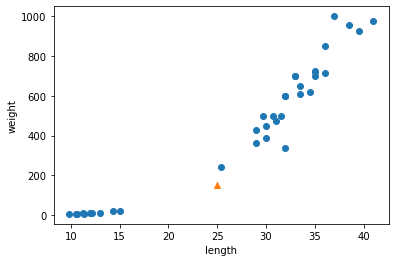

In [13]:
# 도미 데이터들과 더 가까워보이는데 왜?

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

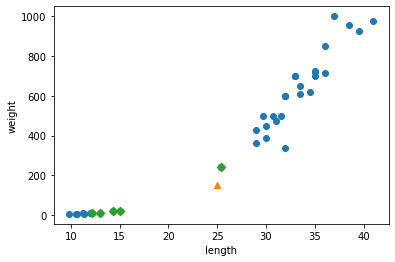

In [14]:
# 주어진 샘플에서 가장 가까운 이웃을 찾아보기


# kneighbors()는 샘플로부터 가장 가까운 샘플까지의 거리와 인덱스를 반환
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(distances)

# 가장 가까운 샘플은 도미, 나머지 4개의 샘플들은 모두 빙어

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [17]:
# 이유는 length 데이터와 weight 데이터의 스케일 차이 때문
# 산점도 그래프 상에서 상대적으로 도미와 더 가까워보이지만 실제로는 빙어와 더 가까웠던 것
# 해결하기 위해 샘플들의 특성값을 일정한 기준으로 맞춰줘야함 = '데이터 전처리'

# 표준 점수 사용
# 표준 점수 = 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
# 표준 점수 공식 = (원본 데이터 - 평균 ) / 표준편차

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

# train_input 데이터의 각 열에 대한 평균
print(mean)

# train_input 데이터의 각 열에 대한 표준편차
print(std)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


In [30]:
# 표준 점수

train_scaled = (train_input - mean) / std

print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


In [19]:
# 당연히 에측에 쓰일 새로운 데이터도 동일한 비율로 변환해줘야함

new = ([25, 150] - mean) / std

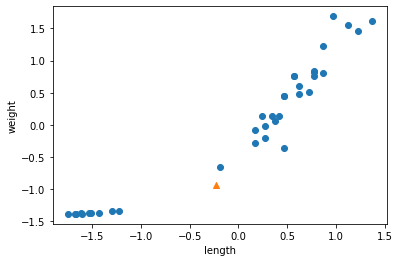

In [20]:
# 전처리된 데이터로 모델 훈련하기

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 모델 훈련

kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [22]:
# 테스트 세트도 변환하기

test_scaled = (test_input - mean ) / std

In [23]:
# 모델 평가하기

kn.score(test_scaled, test_target)

1.0

In [25]:
# 다시 예측해보기

# 이제는 도미가 올바르게 나옴
print(kn.predict([new]))

[1.]


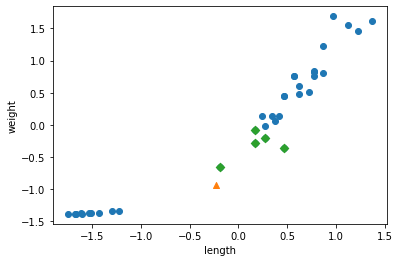

[[-0.19005591  0.17057727  0.27075315  0.47110492  0.17057727]]


In [32]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_scaled[indexes,0])